In [ ]:
#IMPORTING PACKAGES  

In [ ]:
import numpy as np
import pandas as pd

CREATING A DATAFRAME FOR THE CSV

In [ ]:
data=pd.read_csv('/Customers.csv')
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
data.dropna(inplace=True)
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [ ]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


In [ ]:
data.info

<bound method DataFrame.info of       CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0  

In [ ]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,1000.309924,48.894656,110616.009669,51.078880,4.092621,3.757252
std,578.443714,28.414889,45833.860195,27.977176,3.926459,1.968335
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,498.000000,25.000000,74350.000000,28.000000,1.000000,2.000000
50%,1000.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1502.000000,73.000000,149095.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [ ]:
len(data['Annual Income ($)'].unique())

1755

In [ ]:
data['Annual Income ($)'].value_counts()

50000     7
9000      7
97000     6
85000     6
79000     6
         ..
111859    1
164598    1
132951    1
109188    1
110610    1
Name: Annual Income ($), Length: 1755, dtype: int64

In [ ]:
Inc=data[data['Work Experience']>=7]
Inc.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
16,17,Female,35,29000,35,Homemaker,9,5
20,21,Male,35,96000,35,Homemaker,12,1
22,23,Female,46,42000,5,Artist,13,2
26,27,Female,45,68000,32,Healthcare,9,8
33,34,Male,18,62000,92,Homemaker,9,7
38,39,Female,36,9000,26,Artist,8,2
39,40,Female,20,69000,75,Artist,8,2
42,43,Male,48,22000,36,Artist,14,3
44,45,Female,49,72000,28,Engineer,8,1
47,48,Female,27,71000,47,Healthcare,12,1


In [ ]:
import plotly.express as px
fig = px.box(Inc, y='Annual Income ($)')
fig.show()


In [ ]:
fig = px.scatter(Inc, x='Annual Income ($)',y='Work Experience')
fig.show()

In [ ]:
#splitting the dataset for training and testing

from sklearn.model_selection import train_test_split
x=data[['Work Experience','Age']]
y=data[['Annual Income ($)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
# create linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)
L = LinearRegression()
L.fit(x_train, y_train)

LinearRegression()

In [ ]:
# predict
y_pred = L.predict(x_test)
y_pred

array([[109655.93337362],
       [107935.22099985],
       [106888.2702686 ],
       [105574.70540142],
       [110528.39231633],
       [108865.84387207],
       [106340.58939133],
       [106946.43419811],
       [119461.78545768],
       [108424.7379476 ],
       [113242.94469888],
       [112220.19947927],
       [107188.84282239],
       [105376.00810123],
       [122685.00709259],
       [106737.9839917 ],
       [109374.86663228],
       [110911.33431128],
       [106374.5478092 ],
       [112685.51091538],
       [105085.18845366],
       [107004.59812762],
       [105143.35238318],
       [104154.56558144],
       [106505.32827364],
       [113839.03659944],
       [114163.81466488],
       [107213.04833404],
       [106912.47578024],
       [108710.85789598],
       [110955.04563538],
       [110930.84012374],
       [117299.96715944],
       [108250.24615906],
       [117454.95313553],
       [105409.9665191 ],
       [104736.20487658],
       [116117.18275671],
       [1128

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score',r2_score(y_test, y_pred))
print('Mean squared error', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.0018834387532982166
Mean squared error 45626.350310031514


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
from sklearn.linear_model import Ridge
#R = Ridge(alpha=0.0001)
R = Ridge(alpha=0.1)

In [ ]:
R.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
RR=Ridge()
RR

Ridge()

In [ ]:
y_pred1 = R.predict(x_test)

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [ ]:
Grid1.fit(x,y)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=100000)

In [ ]:
y_pred2 = BestRR.predict(x_test)
y_pred2

array([[111129.67463557],
       [110502.61055262],
       [109917.98627887],
       [109518.27608016],
       [111616.86153036],
       [111022.27657373],
       [109278.36443538],
       [109950.46540519],
       [112266.01642895],
       [111109.7532698 ],
       [110462.3401933 ],
       [110225.02562618],
       [109418.24162354],
       [109073.52899458],
       [114399.67808313],
       [110167.85860654],
       [110305.13871704],
       [111496.90570796],
       [108963.53385507],
       [110484.85863673],
       [108911.13336298],
       [109982.94453151],
       [108943.6124893 ],
       [108391.46734187],
       [110037.94210127],
       [111796.58145005],
       [111644.14650134],
       [109765.55133016],
       [110265.2959855 ],
       [109600.5586209 ],
       [110519.93484072],
       [110172.62513409],
       [111726.42904208],
       [111012.31589084],
       [113148.14699491],
       [108758.69841427],
       [108716.25860507],
       [112401.12708956],
       [1115

In [ ]:
BestRR.score(x,y)

0.0035861696762810036

In [ ]:
%matplotlib inline
import seaborn as sns

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    #ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    #ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    ax1 = sns.distplot(RedFunction, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Value of x')
    plt.ylabel('Value of y')

    plt.show()
    plt.close()

In [ ]:
import matplotlib.pyplot as plt

<ipython-input-38-c0ec611fcaa1>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-c0ec611fcaa1>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




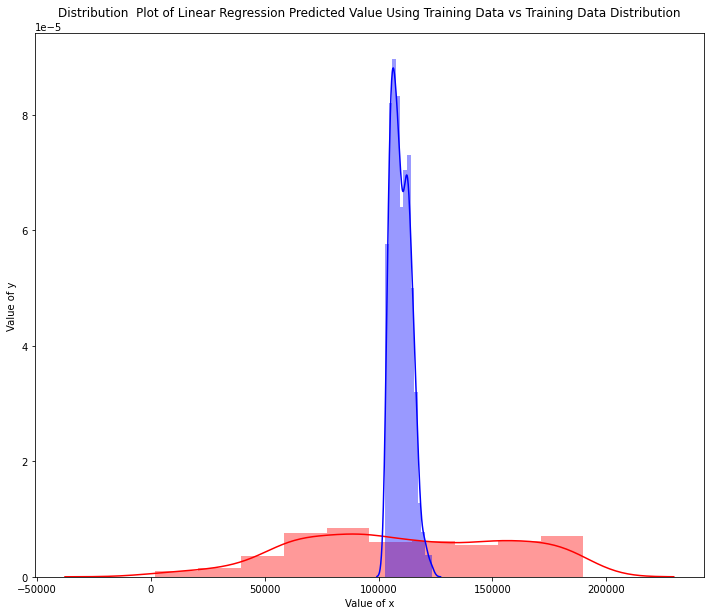

In [ ]:
Title = 'Distribution  Plot of Linear Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-38-c0ec611fcaa1>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-c0ec611fcaa1>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




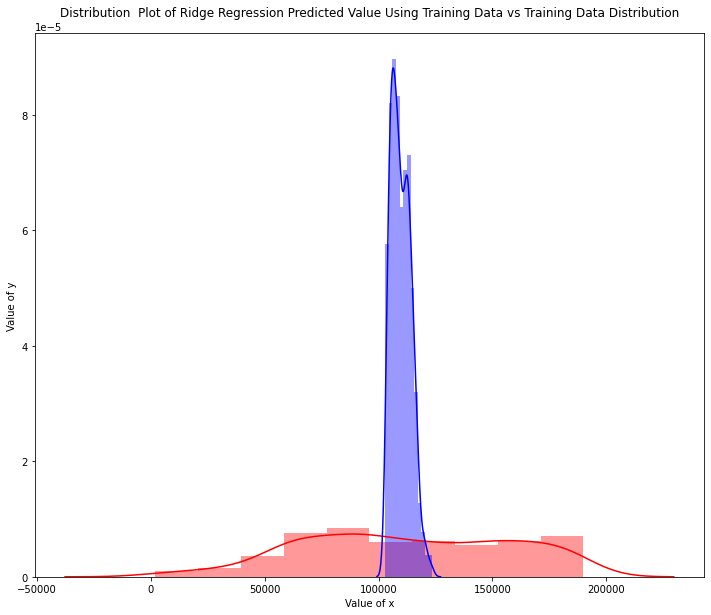

In [ ]:
Title = 'Distribution  Plot of Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred1, "Actual Values (Train)", "Predicted Values (Train)", Title)

<ipython-input-38-c0ec611fcaa1>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-c0ec611fcaa1>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




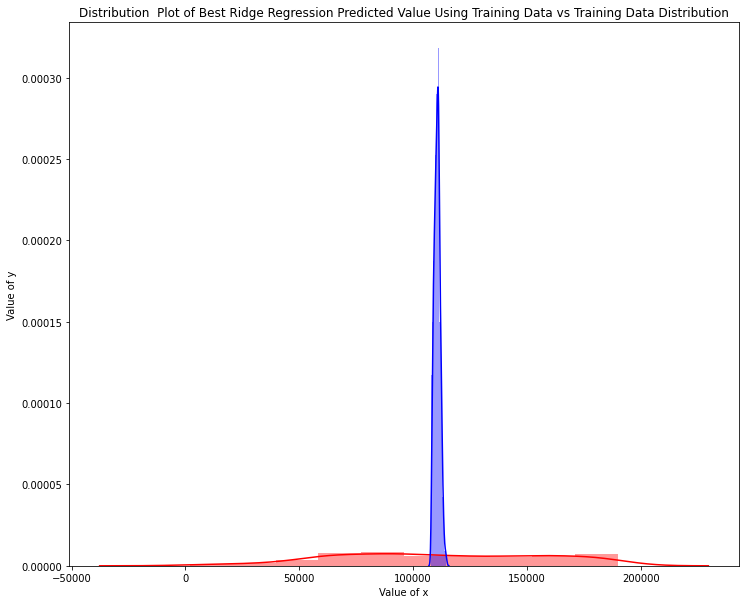

In [ ]:
Title = 'Distribution  Plot of Best Ridge Regression Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, y_pred2, "Actual Values (Train)", "Predicted Values (Train)", Title)